# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import math

## importing dataset

In [2]:
dataset = pd.read_csv('Table - IN_Table.csv.csv')
dataset.describe();

In [3]:
print(dataset)

            IN1       IN2       IN3       IN4       IN5      Out1      Out2
0      0.077744  0.795565 -0.665503  0.879321  0.134419 -0.122686  0.123661
1      0.080313  0.824595 -0.655447  0.875636  0.134941 -0.122686  0.123661
2      0.087355  0.776258 -0.650550  0.884105  0.132452 -0.026857  0.123661
3      0.091774  0.739149 -0.644934  0.892043  0.131287 -0.026857  0.251010
4      0.091166  0.761332 -0.648654  0.892752  0.136788 -0.026857  0.251010
...         ...       ...       ...       ...       ...       ...       ...
14396 -2.371841 -1.399878 -2.594168 -0.861832 -1.607387 -2.039274 -1.531870
14397 -2.378745 -1.407683 -2.601522 -0.871577 -1.604817 -2.039274 -1.531870
14398 -2.385070 -1.388787 -2.606594 -0.880330 -1.579605 -1.943445 -1.659219
14399 -2.386119 -1.372492 -2.615738 -0.886744 -1.556761 -1.943445 -1.659219
14400 -2.382557 -1.357018 -2.612316 -0.888799 -1.535844 -1.943445 -1.659219

[14401 rows x 7 columns]


In [4]:
dataset.dropna() 

,IN1,IN2,IN3,IN4,IN5,Out1,Out2
0,0.077744,0.795565,-0.665503,0.879321,0.134419,-0.122686,0.123661
1,0.080313,0.824595,-0.655447,0.875636,0.134941,-0.122686,0.123661
2,0.087355,0.776258,-0.650550,0.884105,0.132452,-0.026857,0.123661
3,0.091774,0.739149,-0.644934,0.892043,0.131287,-0.026857,0.251010
4,0.091166,0.761332,-0.648654,0.892752,0.136788,-0.026857,0.251010
...,...,...,...,...,...,...,...
14396,-2.371841,-1.399878,-2.594168,-0.861832,-1.607387,-2.039274,-1.531870
14397,-2.378745,-1.407683,-2.601522,-0.871577,-1.604817,-2.039274,-1.531870
14398,-2.385070,-1.388787,-2.606594,-0.880330,-1.579605,-1.943445,-1.659219
14399,-2.386119,-1.372492,-2.615738,-0.886744,-1.556761,-1.943445,-1.659219


In [5]:
def outlier(dataset):
    for column in dataset.columns:
        dataset[column] = dataset[column].astype(float)
        median = st.median(dataset[column])
        std_dev = np.std(dataset[column])
        lower_bound = median - 3*std_dev
        upper_bound = median + 3*std_dev
        dataset = dataset[(dataset[column] >= lower_bound) & (dataset[column] <= upper_bound)]
    return dataset
dataset_c = outlier(dataset)
dataset_c.dropna(inplace=True)
dataset_c.describe()

C:\Users\Abhishek Gonnade\AppData\Local\Temp\ipykernel_11168\2285577944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[column] = dataset[column].astype(float)


,IN1,IN2,IN3,IN4,IN5,Out1,Out2
count,14014.000000,14014.000000,14014.000000,14014.000000,14014.000000,14014.000000,14014.000000
mean,0.012522,0.020190,0.008128,0.025368,-0.010260,-0.001105,-0.006577
std,0.985636,0.995023,0.984860,0.991940,0.970358,0.923232,0.883825
min,-2.634673,-2.422492,-2.631096,-2.354538,-1.934470,-2.805909,-2.805356
25%,-0.286878,-0.918594,-0.292456,-0.877885,-0.709796,-0.506004,-0.513082
50%,0.366122,0.621044,0.225352,0.515633,-0.042572,0.164802,-0.003688
75%,0.680357,0.763112,0.400686,0.887366,0.566638,0.643949,0.505707
max,1.530461,1.939639,1.844610,1.654608,2.957842,3.135513,2.797981


## Removing outliers

In [6]:
import seaborn as sns
#sns.displot(dataset)

<Axes: >

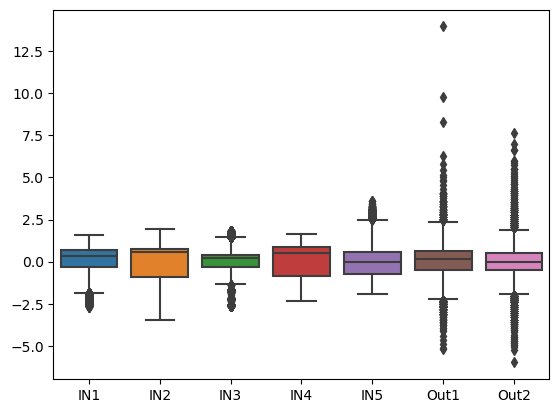

In [7]:
sns.boxplot(dataset)

In [8]:
def outliers(dataset):
    for columns in dataset.columns:
        q1 = dataset[columns].quantile(0.25)
        q3 = dataset[columns].quantile(0.75)
        iqr = q3-q1
        upper_limit = q3 + 1.5*iqr
        lower_limit = q1 - 1.5*iqr
        #capping
        dataset_c = dataset.copy()
        dataset_c.loc[(dataset_c[columns] > upper_limit),columns] = upper_limit
        dataset_c.loc[(dataset_c[columns] < lower_limit),columns] = lower_limit
    return dataset_c

    
#dataset_c = outliers(dataset)
#dataset_c.describe()

# Error Detail

In [9]:
def result(y_test,y_pred,k):
  from sklearn.metrics import r2_score
  from sklearn.metrics import mean_squared_error,mean_absolute_error
  from math import pi,log
  
  r2 = r2_score(y_test,y_pred)
  n = len(y_test)
  SSE= mean_squared_error(y_test,y_pred)
  MAE = mean_absolute_error(y_test,y_pred)
  aic = 2*k + n*log(2*math.pi) + n*log(SSE/n) + n
  bic = k*log(n) + n*math.log(2*pi) + n*log(SSE/n) + n
  print('R2_score :',r2)
  print('SSE :',SSE)
  print('MAE :',MAE)
  print('aic :',aic)
  print('bic :',bic)

# KNN

In [10]:
X = dataset_c.loc[:,['IN1','IN2','IN3','IN4','IN5']]
y = dataset_c.loc[:,'Out1']

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [12]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [13]:
y_pred_knn = knn.predict(X_test)

In [14]:
result(y_test,y_pred_knn,5)

R2_score : 0.6956284034937315
SSE : 0.2537100869279591
MAE : 0.33300396169203117
aic : -18131.384702830765
bic : -18101.69247507494


# Polynomial Regression

In [15]:
X = dataset_c.loc[:,['IN1','IN2','IN3','IN4','IN5']]
y = dataset_c.loc[:,'Out1']

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=6)
X_poly = poly.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_poly,y,test_size = 0.2,random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression
poly_reg = LinearRegression()
poly_reg.fit(X_train,y_train)

LinearRegression()

In [19]:
y_pred_poly = poly_reg.predict(X_test)

In [20]:
result(y_test,y_pred_poly,5)

R2_score : 0.6862948737098291
SSE : 0.26149008571890997
MAE : 0.3801269169579971
aic : -18046.72248558417
bic : -18017.030257828344


# Linear Regression

In [21]:
X = dataset_c.loc[:,['IN1','IN2','IN3','IN4','IN5']]
y = dataset_c.loc[:,'Out1']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [24]:
y_pred_lin = lin_reg.predict(X_test)

In [25]:
result(y_test,y_pred_lin,5)

R2_score : 0.5037888675042501
SSE : 0.41361865234861006
MAE : 0.47190470826437003
aic : -16761.412301247583
bic : -16731.720073491757


# Early Stopping Funtion

In [26]:
from tensorflow.keras import callbacks
early_stopping = callbacks.EarlyStopping(
    monitor="loss",
    min_delta = 0.0001,
    patience = 200,
    restore_best_weights = True,
)

In [27]:
import tensorflow as tf
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

class R2ScoreCallback(tf.keras.callbacks.Callback):
    def __init__(self, validation_data):
        super(R2ScoreCallback, self).__init__()
        self.validation_data = validation_data
        self.r2_scores = [] 

    def on_epoch_end(self, epoch, logs=None):
        val_x, val_y = self.validation_data
        val_predictions = self.model.predict(val_x)
        r2 = r2_score(val_y, val_predictions)
        self.r2_scores.append(r2)
        if epoch % 20 == 0 and epoch != 0:
            print(f"Epoch {epoch}: R2 Score = {r2}")

    def on_train_end(self, logs=None):
        plt.figure(figsize=(10, 6))
        plt.plot(self.r2_scores, label='R² Score')
        plt.xlabel('Epoch')
        plt.ylabel('R2 Score')
        plt.title('R2 Score over Epochs')
        plt.legend()
        plt.show()
    


# Neural Network

In [28]:
X = dataset_c.loc[:,['IN1','IN2','IN3','IN4','IN5']]
y = dataset_c.loc[:,'Out1']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Epoch 1/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   - loss: 0.4401 - mae: 0
701/701 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4399 - mae: 0.4880
Epoch 2/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 0.3967 - mae: 0.4
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3961 - mae: 0.4635
Epoch 3/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - loss: 0.3718 - mae: 0.4
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3716 - mae: 0.4514
Epoch 4/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - loss: 0.3495 - mae: 0.4
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3497 - mae: 0.4401
Epoch 5/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.3577 - mae: 0.4
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3575 - mae: 0.4413
Epoch 6/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.3366 - mae: 0.4
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3369 - mae: 0.4343
Epoch 7/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - loss: 0.3363 - mae: 0.4
701/701 ━━━━━━━━━━━━━━━━━━━━ 

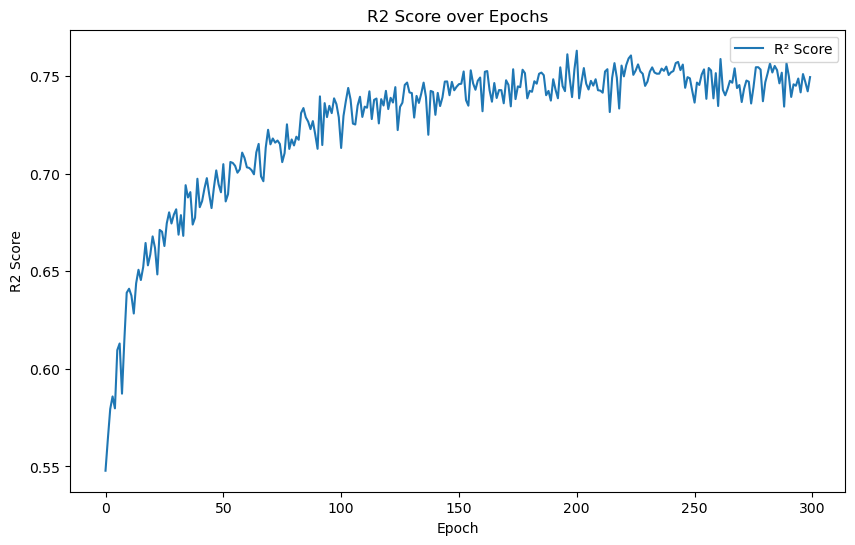

In [29]:
import tensorflow as tf
ann = tf.keras.models.Sequential()
#first layer
#ann.add(tf.keras.layers.Dense(units=50,activation='relu'))
#second layer
#ann.add(tf.keras.layers.Dense(units = 50,activation='relu'))

ann.add(tf.keras.layers.Dense(units = 500,activation='relu'))

ann.add(tf.keras.layers.Dense(units = 500,activation='relu'))

ann.add(tf.keras.layers.Dense(units = 500,activation='relu'))

#output
ann.add(tf.keras.layers.Dense(units=1))
#compiling
ann.compile(optimizer='adam',loss='mse',metrics=['mae'])
#training
r2_callback = R2ScoreCallback(validation_data=(X_test, y_test))
ann.fit(X_train,y_train,batch_size = 16,callbacks = [r2_callback],epochs = 300)


<Axes: >

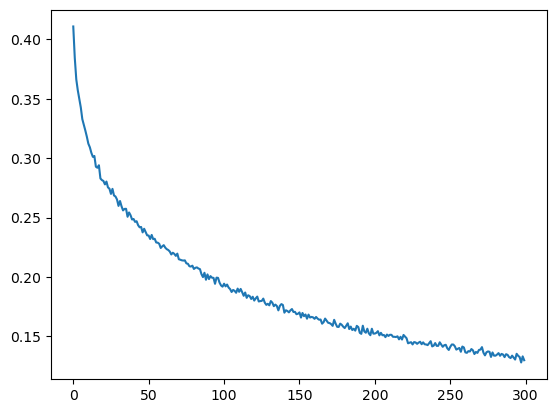

In [30]:
ann_df = pd.DataFrame(ann.history.history)
ann_df['loss'].plot()

In [31]:
y_pred_ann = ann.predict(X_test)

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step


In [32]:
result(y_test,y_pred_ann,5)

R2_score : 0.7494483246690901
SSE : 0.20884828958355764
MAE : 0.3279026738079866
aic : -18676.804002033543
bic : -18647.111774277717


In [33]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 500)                 │           3,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             501 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,513,505 (5.77 MB)

 Trainable params: 504,501 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,009,004 (3.85 MB)

# LSTM

Epoch 1/1000


C:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step   - loss: 0.4998 - mae: 0
351/351 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4994 - mae: 0.5376
Epoch 2/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.4394 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4391 - mae: 0.4925
Epoch 3/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.4292 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4291 - mae: 0.4874
Epoch 4/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.4137 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4137 - mae: 0.4764
Epoch 5/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.4084 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4085 - mae: 0.4755
Epoch 6/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.4126 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4124 - mae: 0.4732
Epoch 7/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - loss: 0.3933 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms

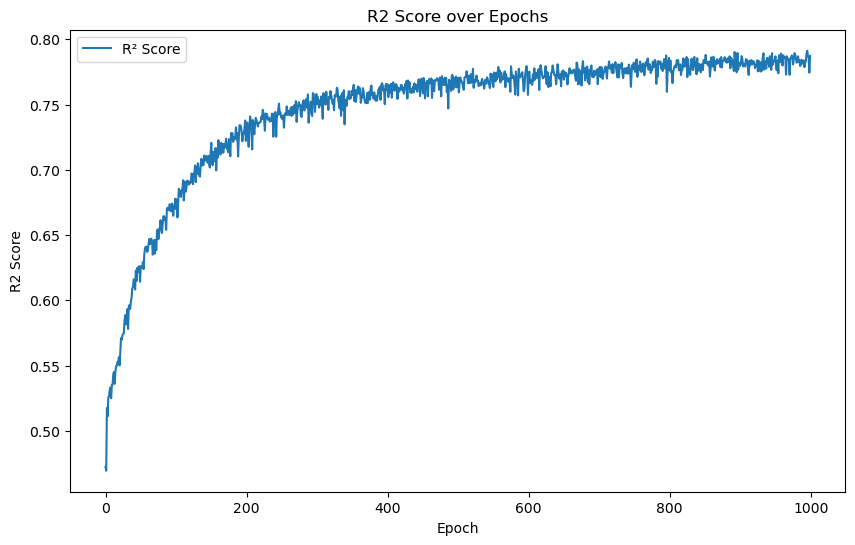

In [34]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

X = dataset_c.loc[:, ['IN1', 'IN2', 'IN3', 'IN4', 'IN5']]
y = dataset_c.loc[:, 'Out1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

timesteps = 5
features = X_train.shape[1]

X_train = np.array(X_train).reshape((X_train.shape[0], timesteps, features // timesteps))
X_test = np.array(X_test).reshape((X_test.shape[0], timesteps, features // timesteps))

y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

lstm_model = tf.keras.models.Sequential([
    layers.LSTM(units=50 ,activation='tanh', return_sequences=True, input_shape=(timesteps, features // timesteps)),
    layers.Dropout(0.05),
    #layers.LSTM(units=50 activation='tanh',return_sequences = True),
    #layers.Dropout(0.05),
    layers.LSTM(units=50,activation='tanh'),
    layers.Dropout(0.05),
    layers.Dense(units=1),
])

lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
r2_callback = R2ScoreCallback(validation_data=(X_test, y_test))

lstm_model.fit(X_train, y_train, batch_size=32,callbacks = [r2_callback], epochs=1000)


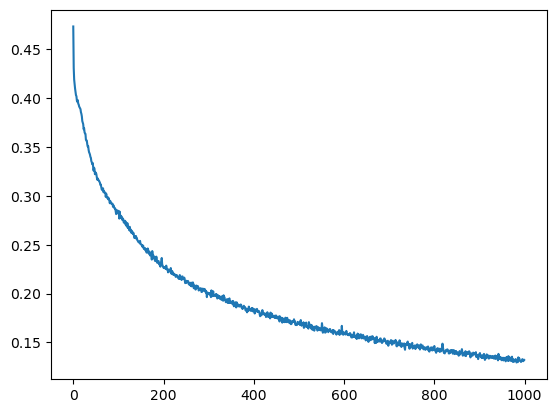

In [35]:
lstm_model_df = pd.DataFrame(lstm_model.history.history)
lstm_model_df['loss'].plot();

In [36]:
y_pred_lstm = lstm_model.predict(X_test)
result(y_test,y_pred_lstm,5)

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step
R2_score : 0.7872817168462738
SSE : 0.17731212350159817
MAE : 0.3016487145636578
aic : -19135.645325211815
bic : -19105.95309745599


In [37]:
lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 5, 50)               │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

# LSTM 2

In [38]:
X = dataset_c.loc[:,['IN1','IN2','IN3','IN4','IN5']]
y = dataset_c.loc[:,'Out1']
Xy = dataset_c.loc[:,['IN1','IN2','IN3','IN4','IN5','Out1']]

In [39]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
Xy = sc.fit_transform(Xy)
X1 = Xy[:,:-1]
y1 = Xy[:,-1]

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size = 0.2,random_state=42)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

C:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


88/88 - 1s - 6ms/step - loss: 0.2494
Epoch 1/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step   - loss:
176/176 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0543
Epoch 2/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0122
Epoch 3/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0125
Epoch 4/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0122
Epoch 5/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0120
Epoch 6/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0125
Epoch 7/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0123
Epoch 8/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0117
Epoc

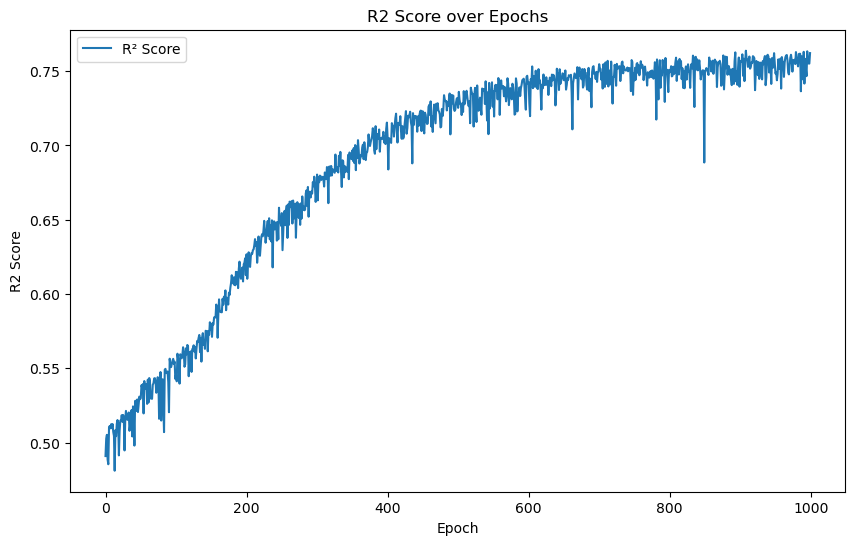

In [41]:
import tensorflow as tf
from keras.layers import LSTM
model = tf.keras.models.Sequential()

model.add(LSTM(units = 256,activation='tanh', return_sequences=True, input_shape=(1,5)))
model.add(tf.keras.layers.Dropout(0.1))
model.add(LSTM(units = 256,activation='tanh',return_sequences=True))
model.add(tf.keras.layers.Dropout(0.1))
model.add(LSTM(units = 256,activation='tanh'))
model.add(tf.keras.layers.Dropout(0.1))
#output
model.add(tf.keras.layers.Dense(units=1))
#compiling
model.compile(optimizer='adam',loss='mse')
loss = model.evaluate(X_test, y_test, verbose=2)
#training
r2_callback = R2ScoreCallback(validation_data=(X_test, y_test))
model.fit(X_train,y_train,batch_size = 64,callbacks = [r2_callback],epochs = 1000)

In [42]:
y_pred_model = model.predict(X_test)
result(y_test,y_pred_model,5)

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
R2_score : 0.7621385069753466
SSE : 0.00561664553527556
MAE : 0.05371751129599075
aic : -28812.097409537288
bic : -28782.40518178146


In [43]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 1, 256)              │         268,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 1, 256)              │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 256)                 │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,957,509 (15.10 MB)

 Trainable params: 1,319,169 (5.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,638,340 (10.06 MB)

# PCA

In [44]:
X = dataset_c.loc[:,['IN1','IN2','IN3','IN4','IN5']]
y = dataset_c.loc[:,'Out1']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

## KNN

In [46]:
from sklearn.neighbors import KNeighborsRegressor
knnp = KNeighborsRegressor(n_neighbors = 3)
knnp.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [47]:
y_pred_knnp = knnp.predict(X_test)
result(y_test,y_pred_knnp,3)

R2_score : 0.024323599008711616
SSE : 0.8132787268931645
MAE : 0.6788626671876478
aic : -14870.221400853141
bic : -14852.406064199648
